In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Link of uploaded csv file
link = 'https://drive.google.com/open?id=1cUSoRhaEY1MudvXi1zPN_-KvEZitSNI7'

In [0]:
fluff, id = link.split('=')
print (id)

1cUSoRhaEY1MudvXi1zPN_-KvEZitSNI7


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('fer2013.csv')

In [0]:
import pandas as pd
import numpy as np

# Read file to pandas dataframe
df = pd.read_csv('fer2013.csv')
lines = df.values

In [0]:
print(lines[35885][2])
num_of_instances = lines.size
print("number of instances: ", num_of_instances)
num_classes = 7

PrivateTest
number of instances:  107658


In [0]:
!pip install -q keras

In [0]:
import os
import keras
from keras.utils import to_categorical
x_train, y_train, x_test, y_test = [], [], [], []
for i in range(0, 35886):
    emotion, img, usage = lines[i][0], lines[i][1], lines[i][2]
    val = img.split(" ")
    pixels = np.array(val, 'float32')
    pixels = np.reshape(pixels, [-1, 48])
    emotion = keras.utils.to_categorical(emotion, num_classes)
    if 'Training' in usage:
        y_train.append(emotion)
        x_train.append(pixels)
    elif 'PrivateTest' in usage:
        y_test.append(emotion)
        x_test.append(pixels)
    elif 'PublicTest' in usage:
        y_train.append(emotion)
        x_train.append(pixels)

Using TensorFlow backend.


In [0]:
print(np.shape(y_train))

(32297, 7)


In [0]:
import numpy as np

x_train = np.array(x_train)
x_train2 = []
x_train2.append(x_train)
x_train2 = np.array(x_train2)
print(np.shape(x_train2))
x_train3 = np.transpose(x_train2, (1,2,3,0))
print(np.shape(x_train3))

x_test = np.array(x_test)
x_test2 = []
x_test2.append(x_test)
x_test2 = np.array(x_test2)
print(np.shape(x_test2))
x_test3 = np.transpose(x_test2, (1,2,3,0))
print(np.shape(x_test3))

(1, 32297, 48, 48)
(32297, 48, 48, 1)
(1, 3589, 48, 48)
(3589, 48, 48, 1)


In [0]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

# Model

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [0]:
batch_size = 256
epochs = 50
early_stopping = EarlyStopping(monitor='val_acc', patience=15)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator()
train_generator = gen.flow(x_train3, y_train, batch_size=batch_size)
test_generator = gen.flow(x_test3, y_test, batch_size=batch_size)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

In [0]:
history = model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs, validation_data=test_generator, validation_steps=len(test_generator), verbose=1, shuffle='True', callbacks=[early_stopping])

Epoch 1/50
256/256 [==============================] - 59s 230ms/step - loss: 2.0315 - acc: 0.2700 - val_loss: 1.6312 - val_acc: 0.3904
Epoch 2/50
256/256 [==============================] - 52s 202ms/step - loss: 1.5579 - acc: 0.3992 - val_loss: 1.4465 - val_acc: 0.4494
Epoch 3/50
256/256 [==============================] - 52s 202ms/step - loss: 1.4092 - acc: 0.4638 - val_loss: 1.3361 - val_acc: 0.4918
Epoch 4/50
256/256 [==============================] - 52s 202ms/step - loss: 1.2998 - acc: 0.5064 - val_loss: 1.2443 - val_acc: 0.5336
Epoch 5/50
256/256 [==============================] - 52s 202ms/step - loss: 1.2105 - acc: 0.5429 - val_loss: 1.1805 - val_acc: 0.5556
Epoch 6/50
256/256 [==============================] - 52s 202ms/step - loss: 1.1286 - acc: 0.5792 - val_loss: 1.1402 - val_acc: 0.5779
Epoch 7/50
256/256 [==============================] - 52s 203ms/step - loss: 1.0435 - acc: 0.6129 - val_loss: 1.1153 - val_acc: 0.5862
Epoch 8/50
256/256 [==============================] - 5

In [0]:
print(history)

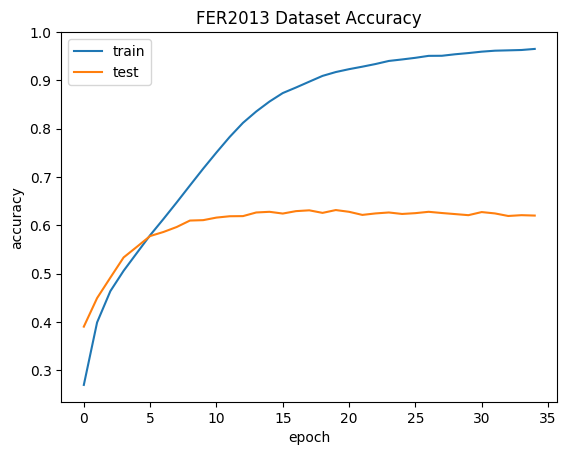

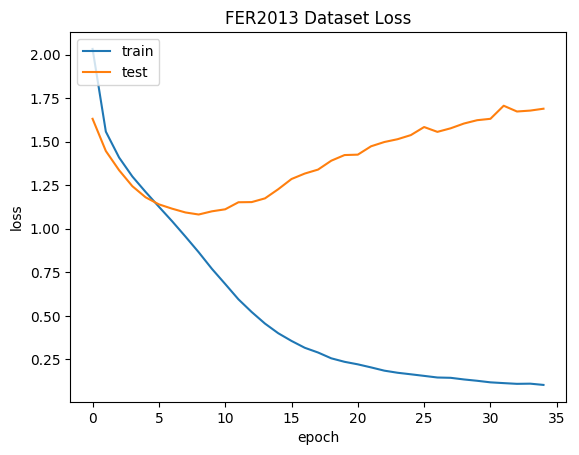

In [0]:
import matplotlib.pyplot as plt
plt.style.use('default')


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('FER2013 Dataset Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('FER2013 Dataset Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
train_score = model.evaluate(x_train3, np.array(y_train), verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])

test_score = model.evaluate(x_test3, np.array(y_test), verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.011688781018440356
Train accuracy: 99.69037371892126
Test loss: 1.689209274675694
Test accuracy: 62.02284759317942


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
pred_list = []; actual_list = []
predictions = model.predict(x_test3)
for i in predictions:
    pred_list.append(np.argmax(i))
for i in y_test:
    actual_list.append(np.argmax(i))
cnf = confusion_matrix(actual_list, pred_list)

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names =['angry','disgust','fear','happy','neutral','surprise','sad']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



Confusion matrix, without normalization
[[240   4  57  44  79  15  52]
 [ 11  33   2   2   6   0   1]
 [ 65   1 226  35  87  60  54]
 [ 23   1  21 739  45  18  32]
 [ 52   1  76  62 291   7 105]
 [  8   0  34  22  12 330  10]
 [ 34   4  42  57 110  12 367]]


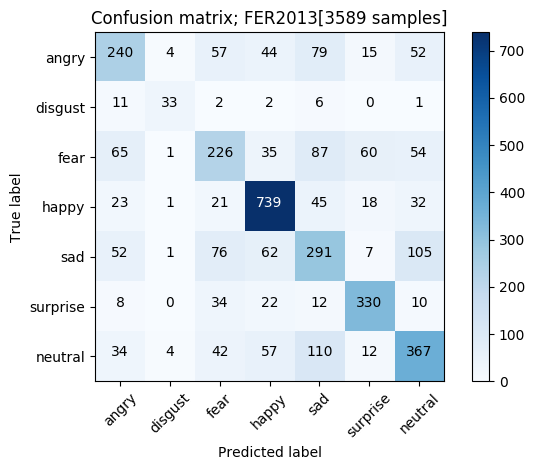

In [0]:
class_names =['angry','disgust','fear','happy','sad','surprise','neutral']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf, classes=class_names,
                      title='Confusion matrix; FER2013[3589 samples]')
plt.show()

In [0]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110377 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
model_json = model.to_json()
with open("drive/DeepLearning/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("drive/DeepLearning/model_weights.h5")
print("Saved model to drive")

Saved model to drive


In [0]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

In [0]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
score = loaded_model.evaluate(x_test3, np.array(y_test), verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator()
train_generator = gen.flow(x_train3, y_train, batch_size=100)
loaded_model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

loaded_model.fit_generator(train_generator, steps_per_epoch=100, epochs=3)

In [0]:
# serialize model to JSON
model_json = loaded_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
loaded_model.save_weights("model.h5")
print("Saved model to disk")

In [0]:
test_score = loaded_model.evaluate(x_test3, np.array(y_test), verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

In [0]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [0]:
import cv2
import numpy as np
from keras.preprocessing import image

img = cv2.imread('surprise.jpg')
img = cv2.resize(img,(48,48))
cv2.imwrite('img_resz.png', img)

#img = cv2.GaussianBlur(img, (3,3), 0)
#img = cv2.bilateralFilter(img, 5, 50, 50)
img = increase_brightness(img, value=30)
cv2.imwrite('img_proc.png', img)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.imwrite('img_gray.png', img_gray)

#print(img_gray)
x = image.img_to_array(img_gray)
x = np.expand_dims(x, axis = 0)
x /= 255
#print(np.shape(x))
custom = loaded_model.predict(x)
print(custom[0])

In [0]:
'''
0: Angry
1: Disgust
2: Fear
3: Happy
4: Sad
5: Surprise
6: Neutral
'''